NAME: Aakriti Singh



PRN: 20190802006




SUB: AIML

AIM: Implement the non-parametric Support Vector Regression algorithm to fit data points. Select appropriate data set for your experiment and draw graphs

In [6]:
# Importing the libraries 
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
color = sns.color_palette()
sns.set_style('darkgrid')

In [8]:
dfSalary = pd.read_csv("Position_Salaries.csv")
print(dfSalary.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [9]:
dfSalary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


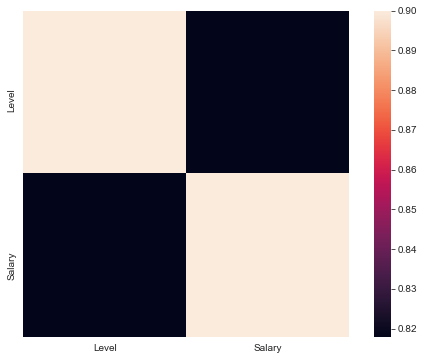

In [10]:
corrmat = dfSalary.corr()
plt.subplots(figsize=(9,6))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [11]:
predictors = ['Level']
target = dfSalary['Salary']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfSalary, target, test_size=0.2)

In [13]:
def launch_model(name,model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train[predictors], y_train)
    y_pred = model.predict(X_test[predictors])
    ypred_train = model.predict(X_train[predictors])
    print ('MSE train', mean_absolute_error(y_train, ypred_train))
    print ('MSE test', mean_absolute_error(y_test, y_pred))
    r_2 = model.score(X_test[predictors], y_test)
    print ('R^2 test', r_2)
    print('Execution time: {0:.2f} Seconds.'.format(time.time() - start))
    return name + '($R^2={:.3f}$)'.format(r_2), np.array(y_test), y_pred

In [14]:
def plot(results):
    fig, plts = plt.subplots(nrows=len(results), figsize=(8, 8))
    fig.canvas.set_window_title('Predicting Salary')

    for subplot, (title, y, y_pred) in zip(plts, results):
        subplot.set_xticklabels(())
        subplot.set_yticklabels(())
        subplot.set_ylabel('Salary')

        subplot.set_title(title)

        subplot.plot(y, 'b', label='actual')
        subplot.plot(y_pred, 'r', label='predicted')

        subplot.fill_between(
            np.arange(0, len(y), 1),
            y,
            y_pred,
            color='r',
            alpha=0.2
        )
        subplot.axvline(len(y) // 2, linestyle='--', color='0', alpha=0.2)

        subplot.legend()

    fig.tight_layout()

    plt.show()

    plt.savefig('plot.png')


    plt.close()

In [15]:
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_lineal = SVR(kernel='linear')
lr = LinearRegression()

In [16]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - lineal')
print ('-----------')
results.append(launch_model('SVR - linear', svr_lineal, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Regresion lineal')
print ('-----------')
results.append(launch_model('Regresion linear', lr, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------
MSE train 208122.91325677824
MSE test 69997.83642196037
R^2 test 6.181555073603295e-05
Execution time: 0.03 Seconds.
-----------
SVR - lineal
-----------
MSE train 208069.875
MSE test 69958.0
R^2 test 0.001199617499999972
Execution time: 0.01 Seconds.
-----------
Regresion lineal
-----------
MSE train 146087.14043993232
MSE test 99018.61252115062
R^2 test -2.9036487287675334
Execution time: 0.03 Seconds.


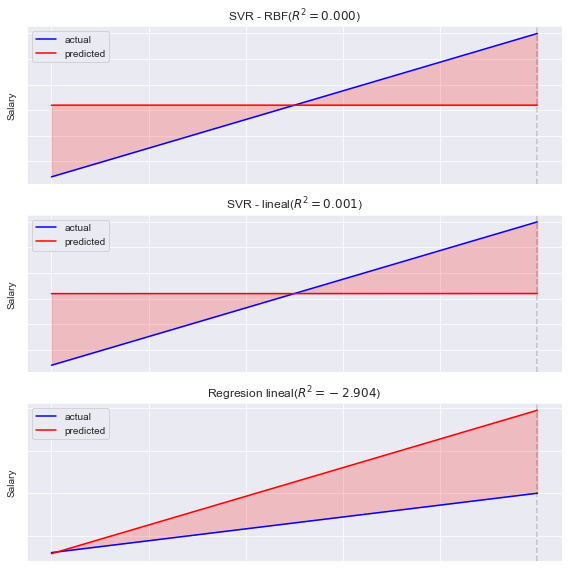

In [17]:
plot(results)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train[predictors])
X_train[predictors] = scaler.transform(X_train[predictors])
X_test[predictors] = scaler.transform(X_test[predictors])

<ipython-input-26-2a03b7e88855>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[predictors] = scaler.transform(X_train[predictors])
D:\Users\Aakriti Singh\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-26-2a03b7e88855>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [20]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - linear')
print ('-----------')
results.append(launch_model('SVR - linear', svr_lineal, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Linear Regression')
print ('-----------')
results.append(launch_model('Linear Regression', lr, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------
MSE train 208124.0947625036
MSE test 69999.25160401096
R^2 test 2.138262241868638e-05
Execution time: 0.01 Seconds.
-----------
SVR - lineal
-----------
MSE train 208119.0304568528
MSE test 69995.45177664974
R^2 test 0.00012994475302130493
Execution time: 0.01 Seconds.
-----------
Regresion lineal
-----------
MSE train 146087.14043993235
MSE test 99018.61252115066
R^2 test -2.903648728767536
Execution time: 0.02 Seconds.


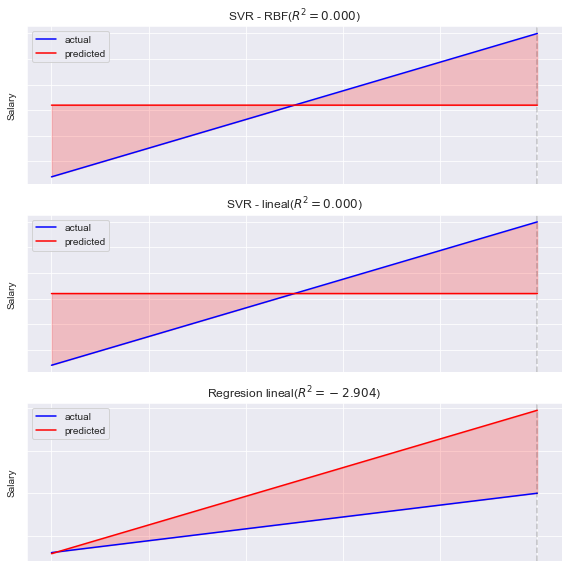

In [21]:
plot(results)

CONCLUSION

We thus have successfully generated SVR for given dataset heart disease.
